In [87]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/big-mart-sales/Test-Set.csv
/kaggle/input/big-mart-sales/Train-Set.csv


In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
import optuna
import warnings
import pandas_profiling

#importing Regressror
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Set random seed for reproducibility
np.random.seed(42)

#F Score and other metrics
from sklearn import metrics
from sklearn.metrics import  mean_absolute_error, mean_squared_error

 # Reading Train and Test datasets

In [89]:
train = pd.read_csv("/kaggle/input/big-mart-sales/Train-Set.csv")
test = pd.read_csv("/kaggle/input/big-mart-sales/Test-Set.csv")

In [90]:
train.head(10)

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [91]:
test.head(10)

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1


 # Exploratory Data Analysis

In [92]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [93]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          5681 non-null   object 
 1   Weight             4705 non-null   float64
 2   FatContent         5681 non-null   object 
 3   ProductVisibility  5681 non-null   float64
 4   ProductType        5681 non-null   object 
 5   MRP                5681 non-null   float64
 6   OutletID           5681 non-null   object 
 7   EstablishmentYear  5681 non-null   int64  
 8   OutletSize         4075 non-null   object 
 9   LocationType       5681 non-null   object 
 10  OutletType         5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [94]:
train.describe()

,Weight,ProductVisibility,MRP,EstablishmentYear,OutletSales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [95]:
test.describe()

,Weight,ProductVisibility,MRP,EstablishmentYear
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


### Visualising the train dataset using pandas profiling

In [96]:
# Generate the report
report = pandas_profiling.ProfileReport(train)

# Save the report to an HTML file
report.to_file('Big_Mart_Sales_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [97]:
# Display the report in the notebook
display(report)

In [98]:
#Checking for duplicate rows in the train dataset

duplicate_rows = train[train.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [ProductID, Weight, FatContent, ProductVisibility, ProductType, MRP, OutletID, EstablishmentYear, OutletSize, LocationType, OutletType, OutletSales]
Index: []


In [99]:
#Checking for duplicate rows in the test dataset

duplicate_rows = test[test.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [ProductID, Weight, FatContent, ProductVisibility, ProductType, MRP, OutletID, EstablishmentYear, OutletSize, LocationType, OutletType]
Index: []


In [100]:
# Counting the number of missing values in each column of the train dataset

missing_val = train.isnull().sum()
print(missing_val)

ProductID               0
Weight               1463
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64


In [101]:
# Counting the number of missing values in each column of the test dataset

missing_val = test.isnull().sum()
print(missing_val)

ProductID               0
Weight                976
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           1606
LocationType            0
OutletType              0
dtype: int64


**The 'Weight' and 'OutletSize' columns in both the train and the 'test' dataset seems to have missing values**

In [102]:
# Checking all the unique values and their counts for the train dataset   
for column in train.columns:
    print(column + ":\t" + str(train[column].nunique()) + " unique values")
    print(train[column].value_counts(), end='\n\n') 

ProductID:	1559 unique values
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: ProductID, Length: 1559, dtype: int64

Weight:	415 unique values
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Weight, Length: 415, dtype: int64

FatContent:	5 unique values
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: FatContent, dtype: int64

ProductVisibility:	7880 unique values
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: ProductVisibility, Length: 7880, dtype: int64

ProductType:	16 unique values
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     

In [103]:
# Checking all the unique values and their counts for the train dataset
for column in test.columns:
    print(column + ":\t" + str(test[column].nunique()) + " unique values")
    print(test[column].value_counts(), end='\n\n') 

ProductID:	1543 unique values
DRF48    8
FDZ50    8
FDQ60    8
FDN52    8
FDW10    8
        ..
FDW49    1
FDG38    1
FDD38    1
FDA15    1
FDF04    1
Name: ProductID, Length: 1543, dtype: int64

Weight:	410 unique values
10.500    57
17.600    53
15.600    48
20.250    47
19.350    46
          ..
6.980      1
6.320      1
5.465      1
5.945      1
7.670      1
Name: Weight, Length: 410, dtype: int64

FatContent:	5 unique values
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: FatContent, dtype: int64

ProductVisibility:	5277 unique values
0.000000    353
0.060879      2
0.097213      2
0.058461      2
0.058132      2
           ... 
0.082382      1
0.026175      1
0.155144      1
0.069557      1
0.104720      1
Name: ProductVisibility, Length: 5277, dtype: int64

ProductType:	16 unique values
Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods

**The 'FatContent' column has categorical values 'LF' 'low fat' which is the same as'Low Fat' category and the value 'reg' which is same as 'Regular'. So lets convert values to either 'Low Fat' or 'Regular' based on the given data.**

In [104]:
train['FatContent'] = train['FatContent'].replace('LF', 'Low Fat')
train['FatContent'] = train['FatContent'].replace('low fat', 'Low Fat')
train['FatContent'] = train['FatContent'].replace('reg', 'Regular')

In [105]:
test['FatContent'] = test['FatContent'].replace('LF', 'Low Fat')
test['FatContent'] = test['FatContent'].replace('low fat', 'Low Fat')
test['FatContent'] = test['FatContent'].replace('reg', 'Regular')

In [106]:
train_sorted = train.sort_values(by=['ProductID'])
train_sorted.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
8043,DRA12,11.6,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,NaN,Tier 3,Grocery Store,283.6308
118,DRA12,11.6,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,NaN,Tier 2,Supermarket Type1,2552.6772
1693,DRA12,11.6,Low Fat,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
1197,DRA12,11.6,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,NaN,Tier 2,Supermarket Type1,3829.0158
1245,DRA12,11.6,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772


In [107]:
train_sorted.tail()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
7926,NCZ54,14.65,Low Fat,0.083489,Household,161.3552,OUT049,1999,Medium,Tier 1,Supermarket Type1,7148.0288
214,NCZ54,14.65,Low Fat,0.000000,Household,161.5552,OUT010,1998,NaN,Tier 3,Grocery Store,324.9104
1896,NCZ54,NaN,Low Fat,0.082956,Household,164.0552,OUT027,1985,Medium,Tier 3,Supermarket Type3,5523.4768
7166,NCZ54,NaN,Low Fat,0.145952,Household,160.9552,OUT019,1985,Small,Tier 1,Grocery Store,162.4552
7738,NCZ54,14.65,Low Fat,0.083699,Household,163.4552,OUT018,2009,Medium,Tier 3,Supermarket Type2,2599.2832


In [108]:
test_sorted = test.sort_values(by=['ProductID'])
test_sorted.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
5081,DRA12,11.60,Low Fat,0.041010,Soft Drinks,141.0154,OUT049,1999,Medium,Tier 1,Supermarket Type1
500,DRA12,11.60,Low Fat,0.040946,Soft Drinks,142.9154,OUT046,1997,Small,Tier 1,Supermarket Type1
3912,DRA12,NaN,Low Fat,0.040748,Soft Drinks,140.0154,OUT027,1985,Medium,Tier 3,Supermarket Type3
2847,DRA24,19.35,Regular,0.040091,Soft Drinks,163.6868,OUT018,2009,Medium,Tier 3,Supermarket Type2
4538,DRA24,19.35,Regular,0.039928,Soft Drinks,164.5868,OUT046,1997,Small,Tier 1,Supermarket Type1


**It can be seen that in that if we sort the dataset by 'ProductID' we can figure out the missing weight values from the given weights of the same product by looking at the weight column**

In [109]:
#Filling the missing weight values
train['Weight'] = train.groupby('ProductID')['Weight'].apply(lambda x: x.fillna(x.mean()))

In [110]:
#Filling the missing weight values
test['Weight'] = test.groupby('ProductID')['Weight'].apply(lambda x: x.fillna(x.mean()))

In [111]:
train_sorted = train.sort_values(by=['ProductID'])
train_sorted.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
8043,DRA12,11.6,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,NaN,Tier 3,Grocery Store,283.6308
118,DRA12,11.6,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,NaN,Tier 2,Supermarket Type1,2552.6772
1693,DRA12,11.6,Low Fat,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
1197,DRA12,11.6,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,NaN,Tier 2,Supermarket Type1,3829.0158
1245,DRA12,11.6,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772


In [112]:
train_sorted.tail()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
7926,NCZ54,14.65,Low Fat,0.083489,Household,161.3552,OUT049,1999,Medium,Tier 1,Supermarket Type1,7148.0288
214,NCZ54,14.65,Low Fat,0.000000,Household,161.5552,OUT010,1998,NaN,Tier 3,Grocery Store,324.9104
1896,NCZ54,14.65,Low Fat,0.082956,Household,164.0552,OUT027,1985,Medium,Tier 3,Supermarket Type3,5523.4768
7166,NCZ54,14.65,Low Fat,0.145952,Household,160.9552,OUT019,1985,Small,Tier 1,Grocery Store,162.4552
7738,NCZ54,14.65,Low Fat,0.083699,Household,163.4552,OUT018,2009,Medium,Tier 3,Supermarket Type2,2599.2832


In [113]:
test_sorted = test.sort_values(by=['ProductID'])
test_sorted.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
5081,DRA12,11.60,Low Fat,0.041010,Soft Drinks,141.0154,OUT049,1999,Medium,Tier 1,Supermarket Type1
500,DRA12,11.60,Low Fat,0.040946,Soft Drinks,142.9154,OUT046,1997,Small,Tier 1,Supermarket Type1
3912,DRA12,11.60,Low Fat,0.040748,Soft Drinks,140.0154,OUT027,1985,Medium,Tier 3,Supermarket Type3
2847,DRA24,19.35,Regular,0.040091,Soft Drinks,163.6868,OUT018,2009,Medium,Tier 3,Supermarket Type2
4538,DRA24,19.35,Regular,0.039928,Soft Drinks,164.5868,OUT046,1997,Small,Tier 1,Supermarket Type1


In [114]:
test_sorted.tail()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
2318,NCZ53,9.60,Low Fat,0.024616,Health and Hygiene,190.0214,OUT017,2007,NaN,Tier 2,Supermarket Type1
1730,NCZ53,9.60,Low Fat,0.024477,Health and Hygiene,189.6214,OUT046,1997,Small,Tier 1,Supermarket Type1
2907,NCZ54,14.65,Low Fat,0.083344,Household,163.6552,OUT035,2004,Small,Tier 2,Supermarket Type1
4307,NCZ54,14.65,Low Fat,0.083290,Household,160.4552,OUT013,1987,High,Tier 3,Supermarket Type1
4700,NCZ54,14.65,Low Fat,0.083831,Household,161.4552,OUT017,2007,NaN,Tier 2,Supermarket Type1


**Analysing the columns OutletID, OutletType and OutletSize with each other so that we can figure out how to fill the missing values in the OutletSize column**

In [115]:
outlet_unique_sizes_train = train.groupby('OutletID')['OutletSize'].unique()
outlet_unique_sizes_train

OutletID
OUT010       [nan]
OUT013      [High]
OUT017       [nan]
OUT018    [Medium]
OUT019     [Small]
OUT027    [Medium]
OUT035     [Small]
OUT045       [nan]
OUT046     [Small]
OUT049    [Medium]
Name: OutletSize, dtype: object

In [116]:
outlet_unique_sizes_test = test.groupby('OutletID')['OutletSize'].unique()
outlet_unique_sizes_test

OutletID
OUT010       [nan]
OUT013      [High]
OUT017       [nan]
OUT018    [Medium]
OUT019     [Small]
OUT027    [Medium]
OUT035     [Small]
OUT045       [nan]
OUT046     [Small]
OUT049    [Medium]
Name: OutletSize, dtype: object

In [117]:
unique_sizes_train2 = train.groupby('OutletID')['OutletType'].unique()
unique_sizes_train2

OutletID
OUT010        [Grocery Store]
OUT013    [Supermarket Type1]
OUT017    [Supermarket Type1]
OUT018    [Supermarket Type2]
OUT019        [Grocery Store]
OUT027    [Supermarket Type3]
OUT035    [Supermarket Type1]
OUT045    [Supermarket Type1]
OUT046    [Supermarket Type1]
OUT049    [Supermarket Type1]
Name: OutletType, dtype: object

In [118]:
unique_sizes_test2 = test.groupby('OutletID')['OutletType'].unique()
unique_sizes_test2

OutletID
OUT010        [Grocery Store]
OUT013    [Supermarket Type1]
OUT017    [Supermarket Type1]
OUT018    [Supermarket Type2]
OUT019        [Grocery Store]
OUT027    [Supermarket Type3]
OUT035    [Supermarket Type1]
OUT045    [Supermarket Type1]
OUT046    [Supermarket Type1]
OUT049    [Supermarket Type1]
Name: OutletType, dtype: object

In [119]:
unique_sizes_train3 = train.groupby('OutletType')['OutletSize'].unique()
unique_sizes_train3

OutletType
Grocery Store                      [nan, Small]
Supermarket Type1    [Medium, High, nan, Small]
Supermarket Type2                      [Medium]
Supermarket Type3                      [Medium]
Name: OutletSize, dtype: object

In [120]:
unique_sizes_test3 = test.groupby('OutletType')['OutletSize'].unique()
unique_sizes_test3

OutletType
Grocery Store                      [nan, Small]
Supermarket Type1    [Medium, nan, Small, High]
Supermarket Type2                      [Medium]
Supermarket Type3                      [Medium]
Name: OutletSize, dtype: object

**It makes sense to fill the missing values in 'OutetSize' column whose 'OutletType' is a 'Grocery Store' with the value 'Small'.
For the missing values in 'OutletSize' column whose 'OutletType' is a 'Supermarket Type1', it is best use its mode value.**

In [121]:
# Fill missing values with 'Small' where OutletType is 'Grocery Store'
train.loc[(train['OutletType'] == 'Grocery Store') & (train['OutletSize'].isna()), 'OutletSize'] = 'Small'
train.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [122]:
# Fill missing values with 'Small' where OutletType is 'Grocery Store'
test.loc[(test['OutletType'] == 'Grocery Store') & (test['OutletSize'].isna()), 'OutletSize'] = 'Small'
test.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,13.600,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [123]:
unique_sizes_train4 = train.groupby('OutletType')['OutletSize'].unique()
unique_sizes_train4

OutletType
Grocery Store                           [Small]
Supermarket Type1    [Medium, High, nan, Small]
Supermarket Type2                      [Medium]
Supermarket Type3                      [Medium]
Name: OutletSize, dtype: object

In [124]:
unique_sizes_test4 = test.groupby('OutletType')['OutletSize'].unique()
unique_sizes_test4

OutletType
Grocery Store                           [Small]
Supermarket Type1    [Medium, nan, Small, High]
Supermarket Type2                      [Medium]
Supermarket Type3                      [Medium]
Name: OutletSize, dtype: object

In [125]:
# Counting the number of missing values in each column of the train dataset

missing_val = train.isnull().sum()
print(missing_val)

ProductID               0
Weight                  4
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           1855
LocationType            0
OutletType              0
OutletSales             0
dtype: int64


In [126]:
# Counting the number of missing values in each column of the test dataset

missing_val = test.isnull().sum()
print(missing_val)

ProductID               0
Weight                 20
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           1236
LocationType            0
OutletType              0
dtype: int64


**Applying Label Encoding the categorical columns who have ordinal values and then apply One-Hot encoding to the categorical columns with nominal values**

In [127]:
# Initialize the Label Encoder
le = LabelEncoder()

# Fit and transform the categorical column
train['FatContent'] = le.fit_transform(train['FatContent'])
train['ProductType'] = le.fit_transform(train['ProductType'])
train['OutletSize'] = le.fit_transform(train['OutletSize'])
train['LocationType'] = le.fit_transform(train['LocationType'])
train['OutletType'] = le.fit_transform(train['OutletType'])
train['ProductType'] = le.fit_transform(train['OutletType'])

In [128]:
test['FatContent'] = le.fit_transform(test['FatContent'])
test['ProductType'] = le.fit_transform(test['ProductType'])
test['OutletSize'] = le.fit_transform(test['OutletSize'])
test['LocationType'] = le.fit_transform(test['LocationType'])
test['OutletType'] = le.fit_transform(test['OutletType'])
test['ProductType'] = le.fit_transform(test['OutletType'])

In [129]:
#product_type = train[["ProductType"]]

# Initialize the One-Hot Encoder
#ohe = OneHotEncoder()

# Fit and transform the "ProductType" column
#product_type_encoded = ohe.fit_transform(product_type).toarray()

# Create a new dataframe with the encoded values
#train_encoded = pd.DataFrame(product_type_encoded, columns=ohe.get_feature_names(['ProductType']))

# Concatenate the original dataframe with the encoded dataframe
#train = pd.concat([train, train_encoded], axis=1)

In [130]:
product_type = test[["ProductType"]]

# Fit and transform the "ProductType" column
product_type_encoded = ohe.fit_transform(product_type).toarray()

# Create a new dataframe with the encoded values
test_encoded = pd.DataFrame(product_type_encoded, columns=ohe.get_feature_names(['ProductType']))

# Concatenate the original dataframe with the encoded dataframe
test = pd.concat([test, test_encoded], axis=1)

In [131]:
train.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,0,0.016047,1,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,2,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,1,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19.20,1,0.000000,0,182.0950,OUT010,1998,2,2,0,732.3800
4,NCD19,8.93,0,0.000000,1,53.8614,OUT013,1987,0,2,1,994.7052


In [132]:
test.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,ProductType_0,ProductType_1,ProductType_2,ProductType_3
0,FDW58,20.750,0,0.007565,1,107.8622,OUT049,1999,1,0,1,0.0,1.0,0.0,0.0
1,FDW14,8.300,1,0.038428,1,87.3198,OUT017,2007,3,1,1,0.0,1.0,0.0,0.0
2,NCN55,14.600,0,0.099575,0,241.7538,OUT010,1998,2,2,0,1.0,0.0,0.0,0.0
3,FDQ58,7.315,0,0.015388,1,155.0340,OUT017,2007,3,1,1,0.0,1.0,0.0,0.0
4,FDY38,13.600,1,0.118599,3,234.2300,OUT027,1985,1,2,3,0.0,0.0,0.0,1.0


**Filling the missing values in OutletSize column with its mode**

In [133]:
# Find the mode of the categorical column
mode_train = train['OutletSize'].mode()[0]
mode_train2 = train['Weight'].mode()[0]

# Fill the missing values in the categorical column with the mode
train['OutletSize'].fillna(mode_train, inplace=True)
train['Weight'].fillna(mode_train2, inplace=True)

In [134]:
# Find the mode of the categorical column
mode_test = test['OutletSize'].mode()[0]
mode_test2 = test['Weight'].mode()[0]

# Fill the missing values in the categorical column with the mode
test['OutletSize'].fillna(mode_test, inplace=True)
test['Weight'].fillna(mode_test2, inplace=True)

In [135]:
# Counting the number of missing values in each column of the train dataset

missing_val = train.isnull().sum()
print(missing_val)

ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
dtype: int64


In [136]:
#Creating a new feature
#from datetime import datetime
# calculate the number of years in operation for each store
#current_year = datetime.now().year
#train['YearsInOperation'] = current_year - train['EstablishmentYear']

In [137]:
#test['YearsInOperation'] = current_year - test['EstablishmentYear']

# Selecting the features set and target model training

In [138]:
#Selecting the desired columns for the model in 'train' dataset

X = train.drop(columns=['ProductID','ProductType','OutletID', 'OutletSales'])
y = train['OutletSales']

In [139]:
X_test = test.drop(columns=['ProductID','ProductType','OutletID'])

# Split the dataset into a train and validation set

In [140]:
# Split the dataset into a train and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the train and validation sets
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(6818, 8) (1705, 8) (6818,) (1705,)


# Selecting CatBoost Regressor model and training it without hyperparameter tuning

In [141]:
# Selecting CatBoostRegressor
cbr = CatBoostRegressor(verbose=False)

cbr.fit(X_train, y_train)

cbr_pred = cbr.predict(X_val)

mse = mean_squared_error(y_val, cbr_pred)
rmse = np.sqrt(mse)
print(f'Root mean squared error: {rmse:.2f}')

Root mean squared error: 1052.90


# Fine tuning the model hyperparameters using Optuna

In [142]:
# Define the objective function for Optuna
def objective(trial):
    params = {
        'iterations': 1000,
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.5),
        'depth': trial.suggest_int('depth', 1, 10),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-8, 10.0),
        'random_strength': trial.suggest_uniform('random_strength', 0.1, 10.0),
        'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 10.0),
        'grow_policy': trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide'])
    }

     # Train the model
    model = CatBoostRegressor(**params, loss_function='RMSE', verbose=False)
    model.fit(X_train , y_train)

    # Calculate the test RMSE
    y_pred = model.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)

    return rmse

warnings.filterwarnings("ignore")

# Set up the Optuna study and run the optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and RMSE
print(f"Best RMSE: {study.best_value:.4f}")
print(f"Best hyperparameters: {study.best_params}")   

[I 2023-04-15 18:57:17,369] A new study created in memory with name: no-name-1100a6b9-3d6e-470f-9c49-4bccf4de0dc7
[I 2023-04-15 18:57:21,154] Trial 0 finished with value: 1101.0054010778986 and parameters: {'learning_rate': 0.06760174459926488, 'depth': 5, 'l2_leaf_reg': 6.062039553502077e-05, 'random_strength': 1.9081597652782407, 'bagging_temperature': 6.136609038136401, 'grow_policy': 'Depthwise'}. Best is trial 0 with value: 1101.0054010778986.
[I 2023-04-15 18:57:45,544] Trial 1 finished with value: 1129.831179206471 and parameters: {'learning_rate': 0.03662397767817117, 'depth': 10, 'l2_leaf_reg': 0.8717356364325454, 'random_strength': 3.532023739594645, 'bagging_temperature': 5.635351666676746, 'grow_policy': 'Depthwise'}. Best is trial 0 with value: 1101.0054010778986.
[I 2023-04-15 18:57:46,795] Trial 2 finished with value: 1073.066978364467 and parameters: {'learning_rate': 0.01212871114823219, 'depth': 1, 'l2_leaf_reg': 0.07930709943635741, 'random_strength': 4.6179469140510

Best RMSE: 1017.2642
Best hyperparameters: {'learning_rate': 0.007887014694347183, 'depth': 4, 'l2_leaf_reg': 0.002946092435625611, 'random_strength': 2.6641636520484493, 'bagging_temperature': 3.277445445975391, 'grow_policy': 'Lossguide'}


# Using the best hyperparameters obtained from hyperparameter tuning by optuna to train the model

In [152]:
cbr_best = CatBoostRegressor(learning_rate=0.007887014694347183, 
                             depth=4, 
                             l2_leaf_reg=0.002946092435625611, 
                             random_strength=2.6641636520484493, 
                             bagging_temperature=3.277445445975391, 
                             grow_policy='Lossguide',
                             verbose=False)
cbr_best.fit(X_train, y_train)

y_pred = cbr_best.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
print(f'Root mean squared error: {rmse:.2f}')


Root mean squared error: 1017.26


# Finding out the importance of the features with respect to the model

In [153]:
importances = cbr_best.feature_importances_
feature_names= X.columns

for feature, importance in zip(feature_names, importances):
    print(f'{feature} : {importance}')

Weight : 0.37949856903190987
FatContent : 0.10006027196630195
ProductVisibility : 0.40811915851389663
MRP : 53.9721078332108
EstablishmentYear : 5.015610881012814
OutletSize : 0.7094276997937354
LocationType : 0.4995042155830892
OutletType : 38.91567137088746


# Visualising each features' importance

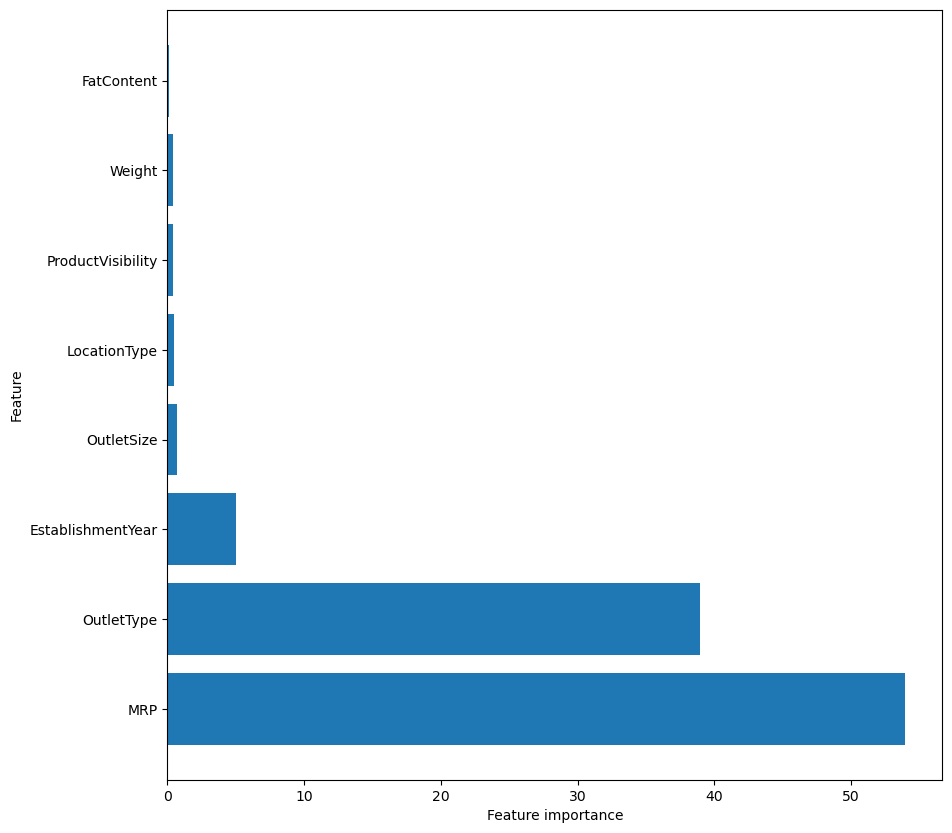

In [154]:
# Create a list of (feature, importance) tuples
feature_importances = [(feature, importance) for feature, importance in zip(feature_names, importances)]

# Sort the feature importances by importance
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Extract the feature names and importances
feature_names, importances = zip(*feature_importances)

# Plot the feature importances
plt.figure(figsize=(10,10))
plt.barh(range(len(feature_names)), importances, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

# Using the trained model to predict the target values of the Test Dataset

In [155]:
y_test = cbr_best.predict(X_test)
y_test
y_test.shape

(5681,)

In [156]:
test.shape

(5681, 15)

### Checking if the model produced any negative value

In [157]:
neg_indices = np.where(y_test < 0)[0]

num_neg = np.count_nonzero(y_test < 0)

print('Number of negative predictions:', num_neg)

# Print the predicted outputs with negative values
if len(neg_indices) > 0:
    print('Model produced negative predictions at indices:', neg_indices)
    print('Negative predicted outputs:', y_test[neg_indices])
else:
    print('Model did not produce negative predictions')

Number of negative predictions: 0
Model did not produce negative predictions


In [149]:
y_test[y_test < 0] = 31.990000
#y_test = np.abs(y_test)

In [150]:
neg_indices = np.where(y_test < 0)[0]

num_neg = np.count_nonzero(y_test < 0)

print('Number of negative predictions:', num_neg)

# Print the predicted outputs with negative values
if len(neg_indices) > 0:
    print('Model produced negative predictions at indices:', neg_indices)
    print('Negative predicted outputs:', y_test[neg_indices])
else:
    print('Model did not produce negative predictions')

Number of negative predictions: 0
Model did not produce negative predictions


# Generating output csv file for submission

In [158]:
output = pd.DataFrame({'Item_Identifier':test.ProductID, 'Outlet_Identifier':test.OutletID, 'Item_Outlet_Sales':y_test})
output.to_csv('Big_Mart_Sales.csv',index=False)
print("Your submission was successfully saved")

Your submission was successfully saved
